# <font color = blue> Importing Libraries</font>

In [ ]:
import pandas as pd
import requests
import json
import numpy as np

# <font color = Blue> Data Reading and Pre-processing</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Reading
Data = pd.read_csv("/content/drive/MyDrive/Aim Technology/Fetching data/dialect_dataset.csv")

In [ ]:
# The data frame dimension
Data.shape

(458197, 2)

In [ ]:
# Show a sample from the data
Data.head()

,id,dialect
0,1175358310087892992,IQ
1,1175416117793349632,IQ
2,1175450108898565888,IQ
3,1175471073770573824,IQ
4,1175496913145217024,IQ


In [ ]:
# Check for duplicates
Data['id'].duplicated().sum()

0

In [ ]:
# Discover the data types of the data columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


<font color = Blue> As we see, the `id` column is `int`, so we need to convert it into object (string) data type.</font>

In [ ]:
# Converting the data type of the id column
Data['id'] = Data['id'].astype('str')

In [ ]:
# Discover the different dialects we have in the data
Data['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [ ]:
# Create a data frame of the dialect counts
dialects_count = Data['dialect'].value_counts()
dialects_count

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

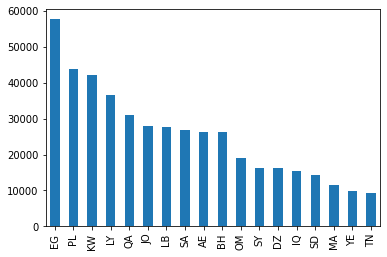

In [ ]:
# Explore the counts
dialects_count.sort_values(ascending=False).plot(kind='bar')

As we see from the above count plot, we have a skewed results `right skewed`. As a result of this data skewness we will find that the `EG, PL, KW, LY, QA` has the majority number of samples. On the other hand we will find that the `IQ, SD, MA, YE, TN` has the lowest number of samples.
>
This means that we have a data `imbalance` and so we need a sampling technique to make it balanced. 

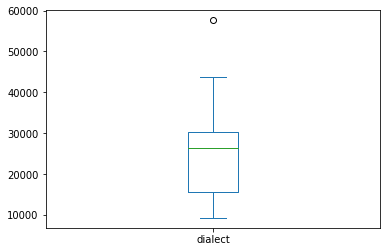

In [ ]:
dialects_count.sort_values(ascending=False).plot(kind='box')

# <font color = blue> Request The Text Data </font>

<font color = blue> The next cell is for test only</font>

In [ ]:
# The URl to get the data from
url = 'https://recruitment.aimtechnologies.co/ai-tasks'

# The ids test sample
ids_list = ["1055620304465215616", "1057418989293485952", "1175358310087892992"]

# Request the dialects text using the dialects ids
request = requests.post(url, json=ids_list)

# Check if the request completed successfuly or not
if request.ok:
  print("The request is completed successfully", end='\n\n')

# Convert the text data int json or dictionary
dialects_text = json.loads(request.content)

# Print the dialect text of any id
dialects_text['1175358310087892992']

The request is completed successfully



'@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .'

<font color = blue> Get the whole dialects text data</font>

In [ ]:
# Extract the ids from the data frame
ids_list_complete = Data['id'].to_list()

# Calculate how many data chunks you have `according to the POST request capacity which is 1000`
length = np.ceil(len(ids_list_complete)/1000)

# Initialize the start of the list
start = 0

# Results list
requested_data = []

# The URl to get the data from
url = 'https://recruitment.aimtechnologies.co/ai-tasks'

# # Make a for loop to read the dialects text
for chunck in range(1, int(length)+1, 1):
  if chunck == length:
    # print(start, end)
    print("We are in the last chunk ", '\n The process completed successfully !!', end='\n\n')
    ids = ids_list_complete[start:]
    dialect = requests.post(url, json=ids)
    # Check if the request completed successfuly or not
    if dialect.ok:
      print("The request is completed successfully", end='\n\n')
    dialect_text = json.loads(dialect.content)
    # print(dialect_text)
    requested_data.append(dialect_text)
    break

  else: 
    # print("We are in else")
    print("We are in chunk number: ", str(chunck), '\n Please wait...', end='\n\n')
    end = int(chunck * 1000)
    # print(start, end)
    ids = ids_list_complete[start:end]
    print(ids)
    dialect = requests.post(url, json=ids)
    # Check if the request completed successfuly or not
    if dialect.ok:
      print("The request is completed successfully", end='\n\n')
    dialect_text = json.loads(dialect.content)
    # print(dialect_text)
    requested_data.append(dialect_text)
    start = end
    # print(ids)    

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Converting the list into a single dictionary
dialect_dict = {k: v for d in requested_data for k, v in d.items() }
len(dialect_dict)
dialect_dict['1175358310087892992']

'@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .'

In [ ]:
# Create a text column in our dialect data frame
Data['Text'] = Data['id'].apply(lambda x: dialect_dict[x])
dialects_with_text_df = Data.copy()

In [ ]:
# Print a sample from the new data frame
dialects_with_text_df.head()

,id,dialect,Text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
# Print the shape of the new data frame
dialects_with_text_df.shape

(458197, 3)

In [ ]:
# Check for null values
dialects_with_text_df.isnull().sum()

id         0
dialect    0
Text       0
dtype: int64

# <font color = blue> Saving the new data frame as a CSV file</font>

In [ ]:
# Save the data in a CSV file
dialects_with_text_df.to_csv('/content/drive/MyDrive/Aim Technology/Fetching data/dialects-with-text.csv', 
            index_label = 'index')

>> **<font color  =blue> I have an issue with saving the new dialects data frame as a CSV file, so I will save it in another extension</font>**

In [ ]:
# Save the data in a CSV file
dialects_with_text_df.to_json('/content/drive/MyDrive/Aim Technology/Fetching data/Dialects-with-text.json')

In [ ]:
# Check the saved file 
dialect_df = pd.read_json('/content/drive/MyDrive/Aim Technology/Fetching data/Dialects-with-text.json', dtype = 'string')
dialect_df.head()

,id,dialect,Text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [ ]:
# Check the shape. Is it the same as the original data frame
dialect_df.shape

(458197, 3)

In [ ]:
# Check for nulls
dialect_df['id'].isnull().sum()

0

In [ ]:
# Check for duplicates in the id
dialect_df.duplicated(subset=['id']).sum()

0